In [1]:
%matplotlib inline
import pandas as pd
from searchTwitter import TwitterSearchTerm #This is an external library I created
import utils as ut # This is an external library I created
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature

# Mendocino fire complex
Big fire that happened in 2018. In this notebook, I'm going to look at tweets from 2018, then reduce the number of tweets on wildfires to only look at California tweets.

My goal: can I look at how the topics change over time? When do people start talking about the wildfire? What are the latent topics that emerge?

In [4]:
# Let's start with this base model
words = [
    "((fire OR fires) ash)",
    "((fire OR fires) particulate)",
    "((fire OR fires) air pollution)",
    "((fire OR fires) air quality)",
    "((fire OR fires) smog)",
    "((fire OR fires) haze)",
    "(smoke (fire OR fires))",
    "(wild (fire OR fires))",
    "wildfire",
    "wildfires",
    "(forest (fire OR fires))"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo -has:media place_country:us"
wf_search = TwitterSearchTerm(query_term, "2018-01-01T00:00:00z","2019-02-01T00:00:00z")
wf_df = wf_search.get_term_count()

Total tweets for query (((fire OR fires) ash) OR ((fire OR fires) particulate) OR ((fire OR fires) air pollution) OR ((fire OR fires) air quality) OR ((fire OR fires) smog) OR ((fire OR fires) haze) OR (smoke (fire OR fires)) OR (wild (fire OR fires)) OR wildfire OR wildfires OR (forest (fire OR fires))) -has:links -is:retweet has:geo -has:media place_country:us :
22330


WF


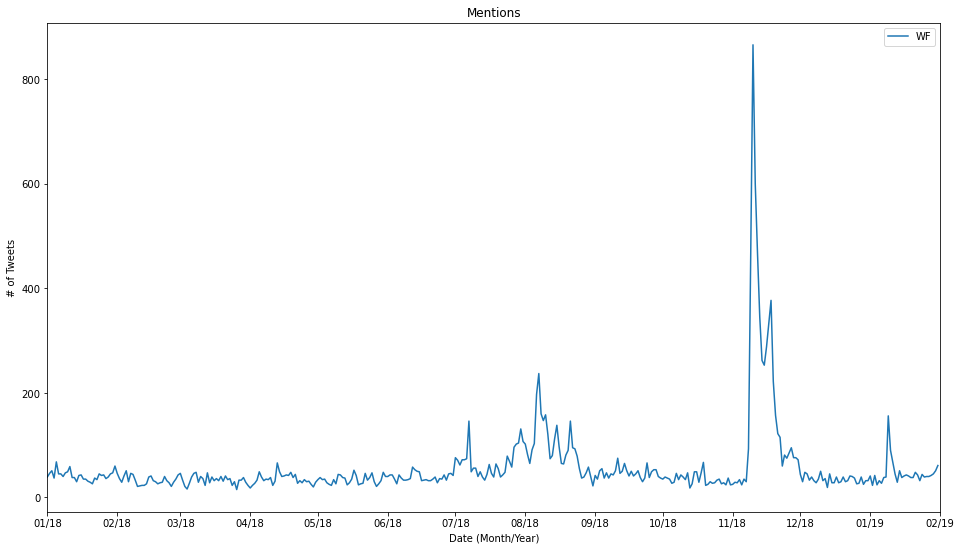

In [5]:
ut.graph_tweet_count([wf_df],datetime(2018,1,1), datetime(2019,2,1), labels=['WF'])

In [7]:
wf_tweets = wf_search.get_tweets()

Making request 1 of 45
Making request 2 of 45
Making request 3 of 45
Making request 4 of 45
Making request 5 of 45
Making request 6 of 45
Making request 7 of 45
Making request 8 of 45
Making request 9 of 45
Making request 10 of 45
Making request 11 of 45
Making request 12 of 45
Making request 13 of 45
Making request 14 of 45
Making request 15 of 45
Making request 16 of 45
Making request 17 of 45
Making request 18 of 45
Making request 19 of 45
Making request 20 of 45
Making request 21 of 45
Making request 22 of 45
Making request 23 of 45
Making request 24 of 45
Making request 25 of 45
Making request 26 of 45
Making request 27 of 45
Making request 28 of 45
Making request 29 of 45
Making request 30 of 45
Making request 31 of 45
Making request 32 of 45
Making request 33 of 45
Making request 34 of 45
Making request 35 of 45
Making request 36 of 45
Making request 37 of 45
Making request 38 of 45
Making request 39 of 45
Making request 40 of 45
Making request 41 of 45
Making request 42 of 45
M

In [8]:
wf_tweets.to_csv("mendocino.csv")

In [14]:
wf_tweets['created_at'][0]

'2019-01-31T23:10:02.000Z'

In [21]:
wf_tweets['created_at'] = [datetime.strptime(d,'%Y-%m-%dT%H:%M:%S.%fZ') for d in wf_tweets['created_at']]

In [23]:
wf_tweets = wf_tweets.drop(columns="date")

In [24]:
wf_tweets

id                                               text  \
0      1091111392910823424  ODOR - SMELL ONLY WITH NO SMOKE VISIBLE at 300...   
1      1091109131489079297  Just talked to a buddy California says the rai...   
2      1091106983632162816  @jamie_uhler It’s not just him though. This ha...   
3      1091104275084820480  @BradHixSays If all these Steelers are as you ...   
4      1091103228471721984  @Aviation_Intel @adminnathan @BlueBookBelieve ...   
...                    ...                                                ...   
21994   947656602835877888  @You_Kno_DennisG Ohio doesn’t have earthquakes...   
21995   947650845381861376  ODOR - SMELL ONLY WITH NO SMOKE VISIBLE at 500...   
21996   947650266983206912  @hcfirerescue on location at 19 E HWY 90 in th...   
21997   947643899534893056  Let us not forget that 2017 was a devastating ...   
21998   947624494348275713  HOUSE FIRE | 1006 W Grand Ave - Haysville | Q3...   

                                                     geo          created_at  \
0      {'coordinates': {'type': 'Point', 'coordinates... 2019-01-31 23:10:02   
1                       {'place_id': '40801c91ed89c83c'} 2019-01-31 23:01:03   
2                       {'place_id': '1d9a5370a355ab0c'} 2019-01-31 22:52:31   
3                       {'place_id': '8d742fb555fbff21'} 2019-01-31 22:41:45   
4                       {'place_id': '00c001194c5e8764'} 2019-01-31 22:37:36   
...                                                  ...                 ...   
21994                   {'place_id': '3df0e3eb1e91170b'} 2018-01-01 02:31:55   
21995  {'coordinates': {'type': 'Point', 'coordinates... 2018-01-01 02:09:02   
21996                   {'place_id': '596fb7b1e3f22a38'} 2018-01-01 02:06:44   
21997                   {'place_id': '01f5e4ff353de1d2'} 2018-01-01 01:41:26   
21998                   {'place_id': '1661ada9b2b18024'} 2018-01-01 00:24:20   

             lat         lon  
0      45.525450 -122.582134  
1      42.120368  -88.481796  
2      41.644102  -87.940033  
3      39.695193  -84.307688  
4      42.627801  -82.976654  
...          ...         ...  
21994  39.832013  -83.200169  
21995  45.527044 -122.641554  
21996  33.535979  -79.069664  
21997  41.596067  -88.487963  
21998  37.562483  -97.534906  

[21999 rows x 6 columns]

In [25]:
ca_wf = wf_tweets[(wf_tweets['lon'] > -125) & (wf_tweets['lon'] < -114) & (wf_tweets['lat'] < 42) & (wf_tweets['lat'] > 32)]

In [36]:
ca_wf['date'] = [d.date() for d in ca_wf['created_at']]

<ipython-input-36-ae7576d62d91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_wf['date'] = [d.date() for d in ca_wf['created_at']]


In [52]:
ca_wf.to_csv('mendocino.csv')

In [41]:
tweet_counts = pd.pivot_table(ca_wf, values='id', index='date',aggfunc='count')

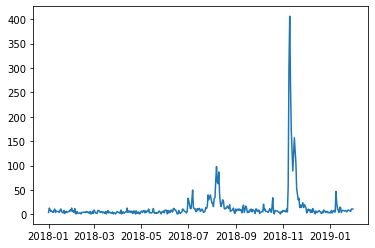

In [42]:
plt.plot(tweet_counts)

/opt/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


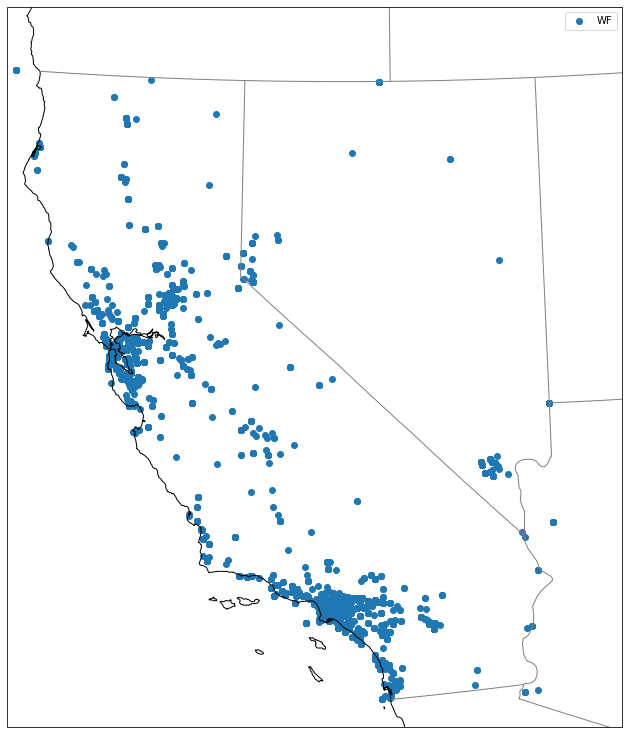

In [51]:
fig = plt.figure(figsize=(20,10))
img_extent = (-124, -113, 32, 43)
ax = fig.add_axes([0,0,1,1], 
                  projection=cartopy.crs.LambertConformal(central_longitude=-118))
ax.set_extent(img_extent, cartopy.crs.Geodetic())

state_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.coastlines()
ax.add_feature(state_provinces, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')
ax.scatter(ca_wf['lon'], ca_wf['lat'], transform=cartopy.crs.PlateCarree(), label='WF')
# ax.scatter(co_health['lon'], co_health['lat'], transform=cartopy.crs.PlateCarree(), label='Health')
# ax.scatter(-105.17, 40.1, transform=cartopy.crs.PlateCarree(), s=100, c='black', label="Boulder")
ax.legend()

In [3]:
# Let's look at the health related tweets.
words = [
    "breathe",
    "asthma",
    "lungs",
    "cough",
    "headache",
    "(itchy eyes)",
    "(sore throat)"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo -has:media place_country:us"
health_search = TwitterSearchTerm(query_term, "2018-01-01T00:00:00z","2019-01-01T00:00:00z")
health_df = health_search.get_term_count()

Total tweets for query (breathe OR asthma OR lungs OR cough OR headache OR (itchy eyes) OR (sore throat)) -has:links -is:retweet has:geo -has:media place_country:us :
220435


Health


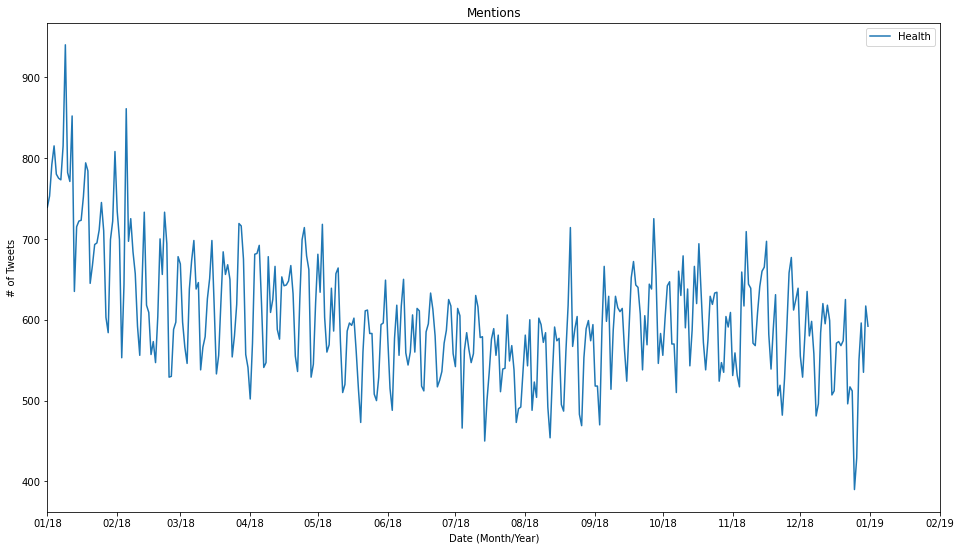

In [53]:
ut.graph_tweet_count([health_df],datetime(2018,1,1), datetime(2019,2,1), labels=['Health'])

In [8]:
df = pd.read_csv('mendocino.csv')

In [3]:
df

Unnamed: 0                   id  \
0             13  1091061532023173121   
1             17  1091043370649116672   
2             18  1091043339292487680   
3             19  1091041883151712257   
4             21  1091020007805317120   
...          ...                  ...   
5562       21952   948021954417606656   
5563       21961   947954852058951680   
5564       21970   947905231844622336   
5565       21984   947719251095314432   
5566       21985   947708466721800192   

                                                   text  \
0     @kapono_lucas All their soups are pretty fire....   
1     PG&amp;E attorney: Goal is to establish a trus...   
2     Attending 411 sen hearing on wildfires. 140 de...   
3     In bankruptcy court for PG&amp;E hearing. PG&a...   
4     @BrandiKruse @waDNR @Hilary_FranzCPL Nope. The...   
...                                                 ...   
5562  Darien Cl: Metro Engine 50 on scene reporting ...   
5563  @KevinNews3LV @News3LV Is that normal? I don’t...   
5564  SPARC, remember, survived the Sonoma wildfires...   
5565  I just asked by pair of tourist if the fire wa...   
5566  @Sasseam I have been here for months. Only saw...   

                                   geo           created_at        lat  \
0     {'place_id': '8fa6d7a33b83ef26'}  2019-01-31 19:51:54  35.984784   
1     {'place_id': '5a110d312052166f'}  2019-01-31 18:39:44  37.708075   
2     {'place_id': 'b71fac2ee9792cbe'}  2019-01-31 18:39:37  38.437920   
3     {'place_id': '5a110d312052166f'}  2019-01-31 18:33:50  37.708075   
4     {'place_id': '3b36422b848153f4'}  2019-01-31 17:06:54  36.527438   
...                                ...                  ...        ...   
5562  {'place_id': 'd950fc7dc2cd14f9'}  2018-01-02 02:43:41  38.637436   
5563  {'place_id': '3b77caf94bfc81fe'}  2018-01-01 22:17:03  33.704538   
5564  {'place_id': 'e5aa5b4c943f642b'}  2018-01-01 18:59:53  38.384995   
5565  {'place_id': '0509a6acb3d27ec4'}  2018-01-01 06:40:51  34.126875   
5566  {'place_id': '5ba10bd86075a50f'}  2018-01-01 05:58:00  34.381692   

             lon        date  
0    -115.209254  2019-01-31  
1    -122.514926  2019-01-31  
2    -121.576613  2019-01-31  
3    -122.514926  2019-01-31  
4    -119.430683  2019-01-31  
...          ...         ...  
5562 -121.262498  2018-01-02  
5563 -118.668404  2018-01-01  
5564 -122.848005  2018-01-01  
5565 -119.061758  2018-01-01  
5566 -119.544568  2018-01-01  

[5567 rows x 8 columns]

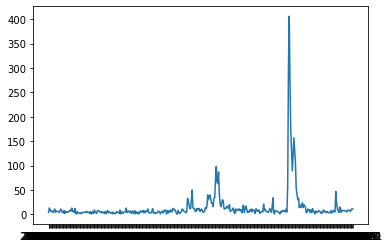

In [48]:
tweet_counts = pd.pivot_table(df, values='id', index='date',aggfunc='count')
plt.plot(tweet_counts)

In [41]:
def get_area(df, lat, lon):
    return df[(df['lon'] > lon[0]) & (df['lon'] < lon[1]) & (df['lat'] < lat[1]) & (df['lat'] > lat[0])]

In [42]:
md_df = get_area(df, [38, 40], [-124,-121])

In [43]:
md_df

Unnamed: 0                   id  \
2             18  1091043339292487680   
11            62  1090745590542004224   
30           143  1090133414684966912   
35           163  1089967340333150209   
46           225  1089360700693049344   
...          ...                  ...   
5523       21720   949756460837343237   
5545       21891   948542986274586624   
5561       21951   948023520318996480   
5562       21952   948021954417606656   
5564       21970   947905231844622336   

                                                   text  \
2     Attending 411 sen hearing on wildfires. 140 de...   
11    When @JimWoodAD2 asks @PickerCPUC what he can ...   
30    PG&amp;E is entering bankruptcy at midnight to...   
35               @MKGenest The Bambi forest fire scene.   
46    Dear #rainbowrangers on @nickjr - I don’t thin...   
...                                                 ...   
5523  Firefighters are responding to a possible stru...   
5545  @WilDonnelly On the flip side, does he want to...   
5561  Darien Cl: Crews reporting smoke from around t...   
5562  Darien Cl: Metro Engine 50 on scene reporting ...   
5564  SPARC, remember, survived the Sonoma wildfires...   

                                   geo           created_at        lat  \
2     {'place_id': 'b71fac2ee9792cbe'}  2019-01-31 18:39:37  38.437920   
11    {'place_id': 'b71fac2ee9792cbe'}  2019-01-30 22:56:28  38.437920   
30    {'place_id': 'b71fac2ee9792cbe'}  2019-01-29 06:23:54  38.437920   
35    {'place_id': '5a9de3ff3fdd849d'}  2019-01-28 19:23:59  38.396779   
46    {'place_id': 'b90f2a335f8565c0'}  2019-01-27 03:13:25  38.562585   
...                                ...                  ...        ...   
5523  {'place_id': '9b381228ebd9a499'}  2018-01-06 21:36:00  39.676071   
5545  {'place_id': '6da7626e4e9e26ba'}  2018-01-03 13:14:05  38.157928   
5561  {'place_id': 'd950fc7dc2cd14f9'}  2018-01-02 02:49:55  38.637436   
5562  {'place_id': 'd950fc7dc2cd14f9'}  2018-01-02 02:43:41  38.637436   
5564  {'place_id': 'e5aa5b4c943f642b'}  2018-01-01 18:59:53  38.384995   

             lon        date  
2    -121.576613  2019-01-31  
11   -121.576613  2019-01-30  
30   -121.576613  2019-01-29  
35   -122.779239  2019-01-28  
46   -121.423941  2019-01-27  
...          ...         ...  
5523 -121.919174  2018-01-06  
5545 -122.163438  2018-01-03  
5561 -121.262498  2018-01-02  
5562 -121.262498  2018-01-02  
5564 -122.848005  2018-01-01  

[674 rows x 8 columns]

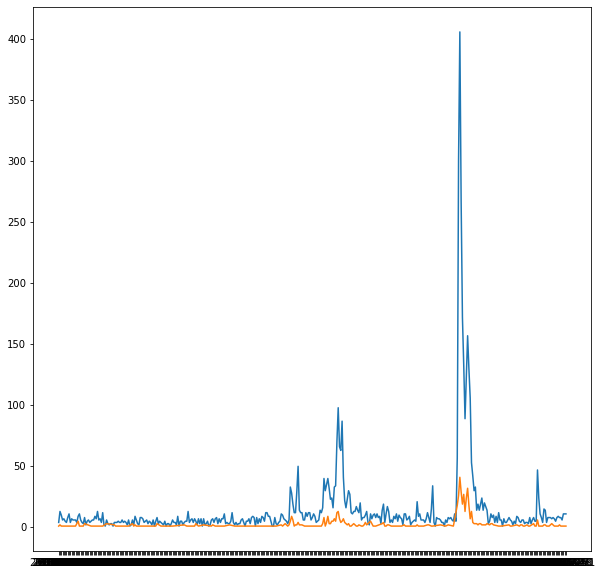

In [49]:
md_tc = pd.pivot_table(md_df, values='id', index='date',aggfunc='count')
plt.figure(figsize=(10,10))
plt.plot(tweet_counts)
plt.plot(md_tc)


In [51]:
# Data downloaded from
# https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
aqi_2018 = pd.read_csv('../data/daily_aqi_by_county_2018.csv')

In [53]:
ca_aqi = aqi_2018[aqi_2018['State Name']=="California"]

In [57]:
mendocino = ca_aqi[ca_aqi['county Name']=="Mendocino"]

In [68]:
mendocino[['Date','AQI']]

Date  AQI
22352  2018-01-01   72
22353  2018-01-02   60
22354  2018-01-03   58
22355  2018-01-04   26
22356  2018-01-05   25
...           ...  ...
22711  2018-12-27   40
22712  2018-12-28   58
22713  2018-12-29   64
22714  2018-12-30   44
22715  2018-12-31   43

[364 rows x 2 columns]

In [87]:
mendocino['Date'].iloc[0]

str

In [69]:
tweet_counts.reset_index(inplace=True)

In [105]:
# Create a new data frame for looking at tweet counts and 
# AQI on the same graph

rows = []
for i, d in enumerate(mendocino['Date']):
    date = datetime.strptime(d,'%Y-%m-%d')
    try:
        count = tweet_counts.loc[d]['id']
    except:
        count = 0
    aqi = mendocino['AQI'].iloc[i]
    
    rows.append([date, count, aqi])

In [109]:
new_df = pd.DataFrame(rows, columns=['date','tweets','aqi'])

In [110]:
new_df

date  tweets  aqi
0   2018-01-01       4   72
1   2018-01-02      13   60
2   2018-01-03      10   58
3   2018-01-04       6   26
4   2018-01-05       7   25
..         ...     ...  ...
359 2018-12-27       4   40
360 2018-12-28       6   58
361 2018-12-29       6   64
362 2018-12-30       3   44
363 2018-12-31       4   43

[364 rows x 3 columns]

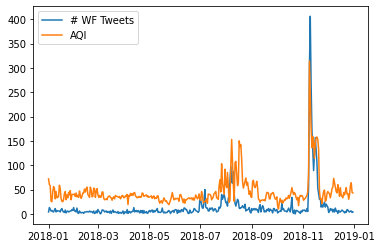

In [116]:
plt.plot(new_df['date'],new_df['tweets'], label="# WF Tweets")
plt.plot(new_df['date'], new_df['aqi'], label="AQI")
plt.legend()

Text(0, 0.5, 'AQI')

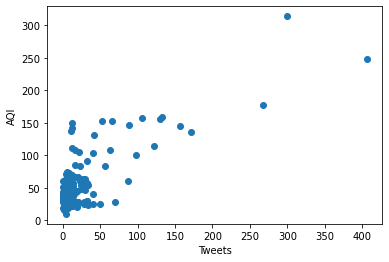

In [115]:
plt.scatter(new_df['tweets'],new_df['aqi'])
plt.xlabel("# of WF Tweets")
plt.ylabel("AQI")

Now, can we do this with health-related tweets, too?

In [14]:
# Can we pinpoint where tweets related to health spike for lung related issues
# near a California hospital, in Mendocino county?
words = [
    "breathe",
    "asthma",
    "lungs",
    "cough",
    "headache",
    "(itchy eyes)",
    "(sore throat)"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo point_radius:[-123.33 39.43 25mi] -has:media place_country:us"
health_search = TwitterSearchTerm(query_term, "2018-01-01T00:00:00z","2019-01-01T00:00:00z")
health_df = health_search.get_term_count()

Total tweets for query (breathe OR asthma OR lungs OR cough OR headache OR (itchy eyes) OR (sore throat)) -has:links -is:retweet has:geo point_radius:[-123.33 39.43 25mi] -has:media place_country:us :
11


Health


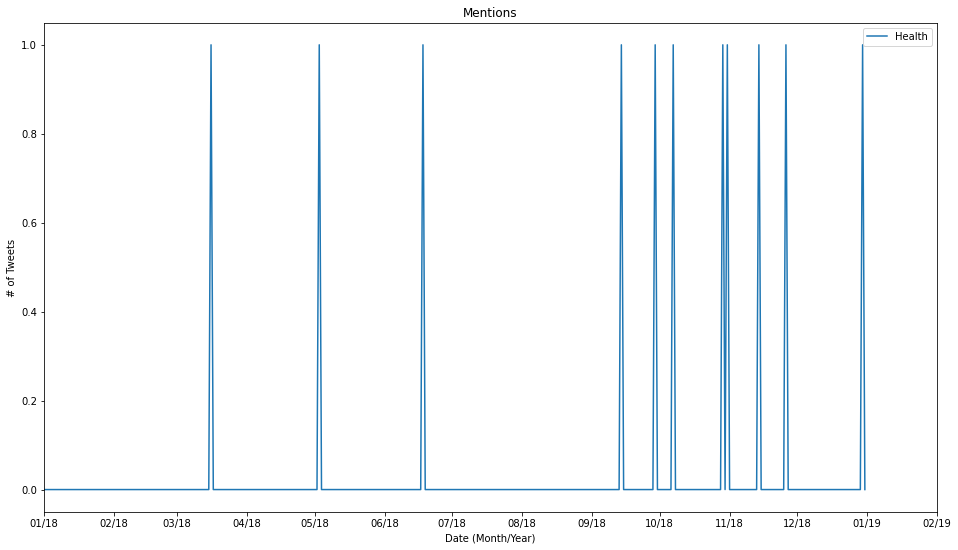

In [15]:
ut.graph_tweet_count([health_df],datetime(2018,1,1), datetime(2019,2,1), labels=['Health'])

**Hospitals in Mendocino county**
* Frank R Howard Memorial Hospital
* Hillside Community Hospital
* Mendocino Coast District Hospital
* Mendocino County Hospital
* Mendocino State Hospital
* Ukiah General Hospital
* Ukiah Valley Medical Center

In [117]:
class Hospital():
    def __init__(self, name, lat, lon):
        self.name = name
        self.lat = lat
        self.lon = lon
        self.count = None
        
    def get_tweet_count(self,):
        query_term = f"-has:links lang:en -is:retweet has:geo point_radius:[{self.lon} {self.lat} 25mi] -has:media place_country:us"
        self.search = TwitterSearchTerm(query_term, "2018-01-01T00:00:00z","2019-01-01T00:00:00z")
        self.count = self.search.get_term_count()
        return self.count
        

In [118]:
f = Hospital("Frank R Howard Memorial Hospital", 39.42657865316148, -123.3289731870925)

Total tweets for query -has:links lang:en -is:retweet has:geo point_radius:[-123.3289731870925 39.42657865316148 25mi] -has:media place_country:us :
12426
Frank R Howard


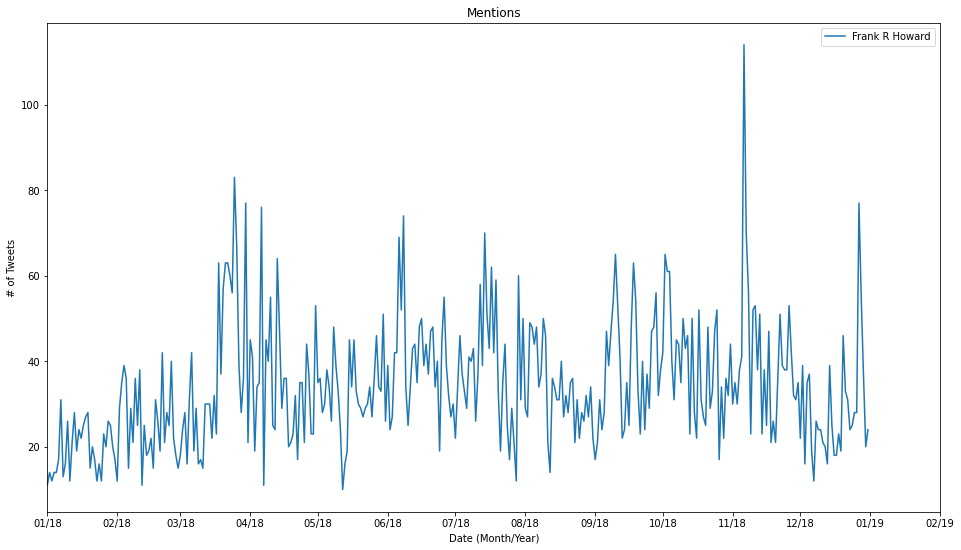

In [120]:
df = f.get_tweet_count()
ut.graph_tweet_count([df],datetime(2018,1,1), datetime(2019,2,1), labels=['Frank R Howard'])

In [121]:
hospital_tweets = f.search.get_tweets()

Making request 1 of 25
Making request 2 of 25
Making request 3 of 25
Making request 4 of 25
Making request 5 of 25
Making request 6 of 25
Making request 7 of 25
Making request 8 of 25
Making request 9 of 25
Making request 10 of 25
Making request 11 of 25
Making request 12 of 25
Making request 13 of 25
Making request 14 of 25
Making request 15 of 25
Making request 16 of 25
Making request 17 of 25
Making request 18 of 25
Making request 19 of 25
Making request 20 of 25
Making request 21 of 25
Making request 22 of 25
Making request 23 of 25
Making request 24 of 25
Making request 25 of 25
Query finished


In [8]:
from wordcloud import WordCloud, STOPWORDS
hosp_tweet_text = hospital_tweets['text']
words = []
for t in hosp_tweet_text:
    t = t.lower()
    t = [w for w in t.split(" ") if w.isalpha()]
    words = words + t

(-0.5, 2999.5, 1999.5, -0.5)

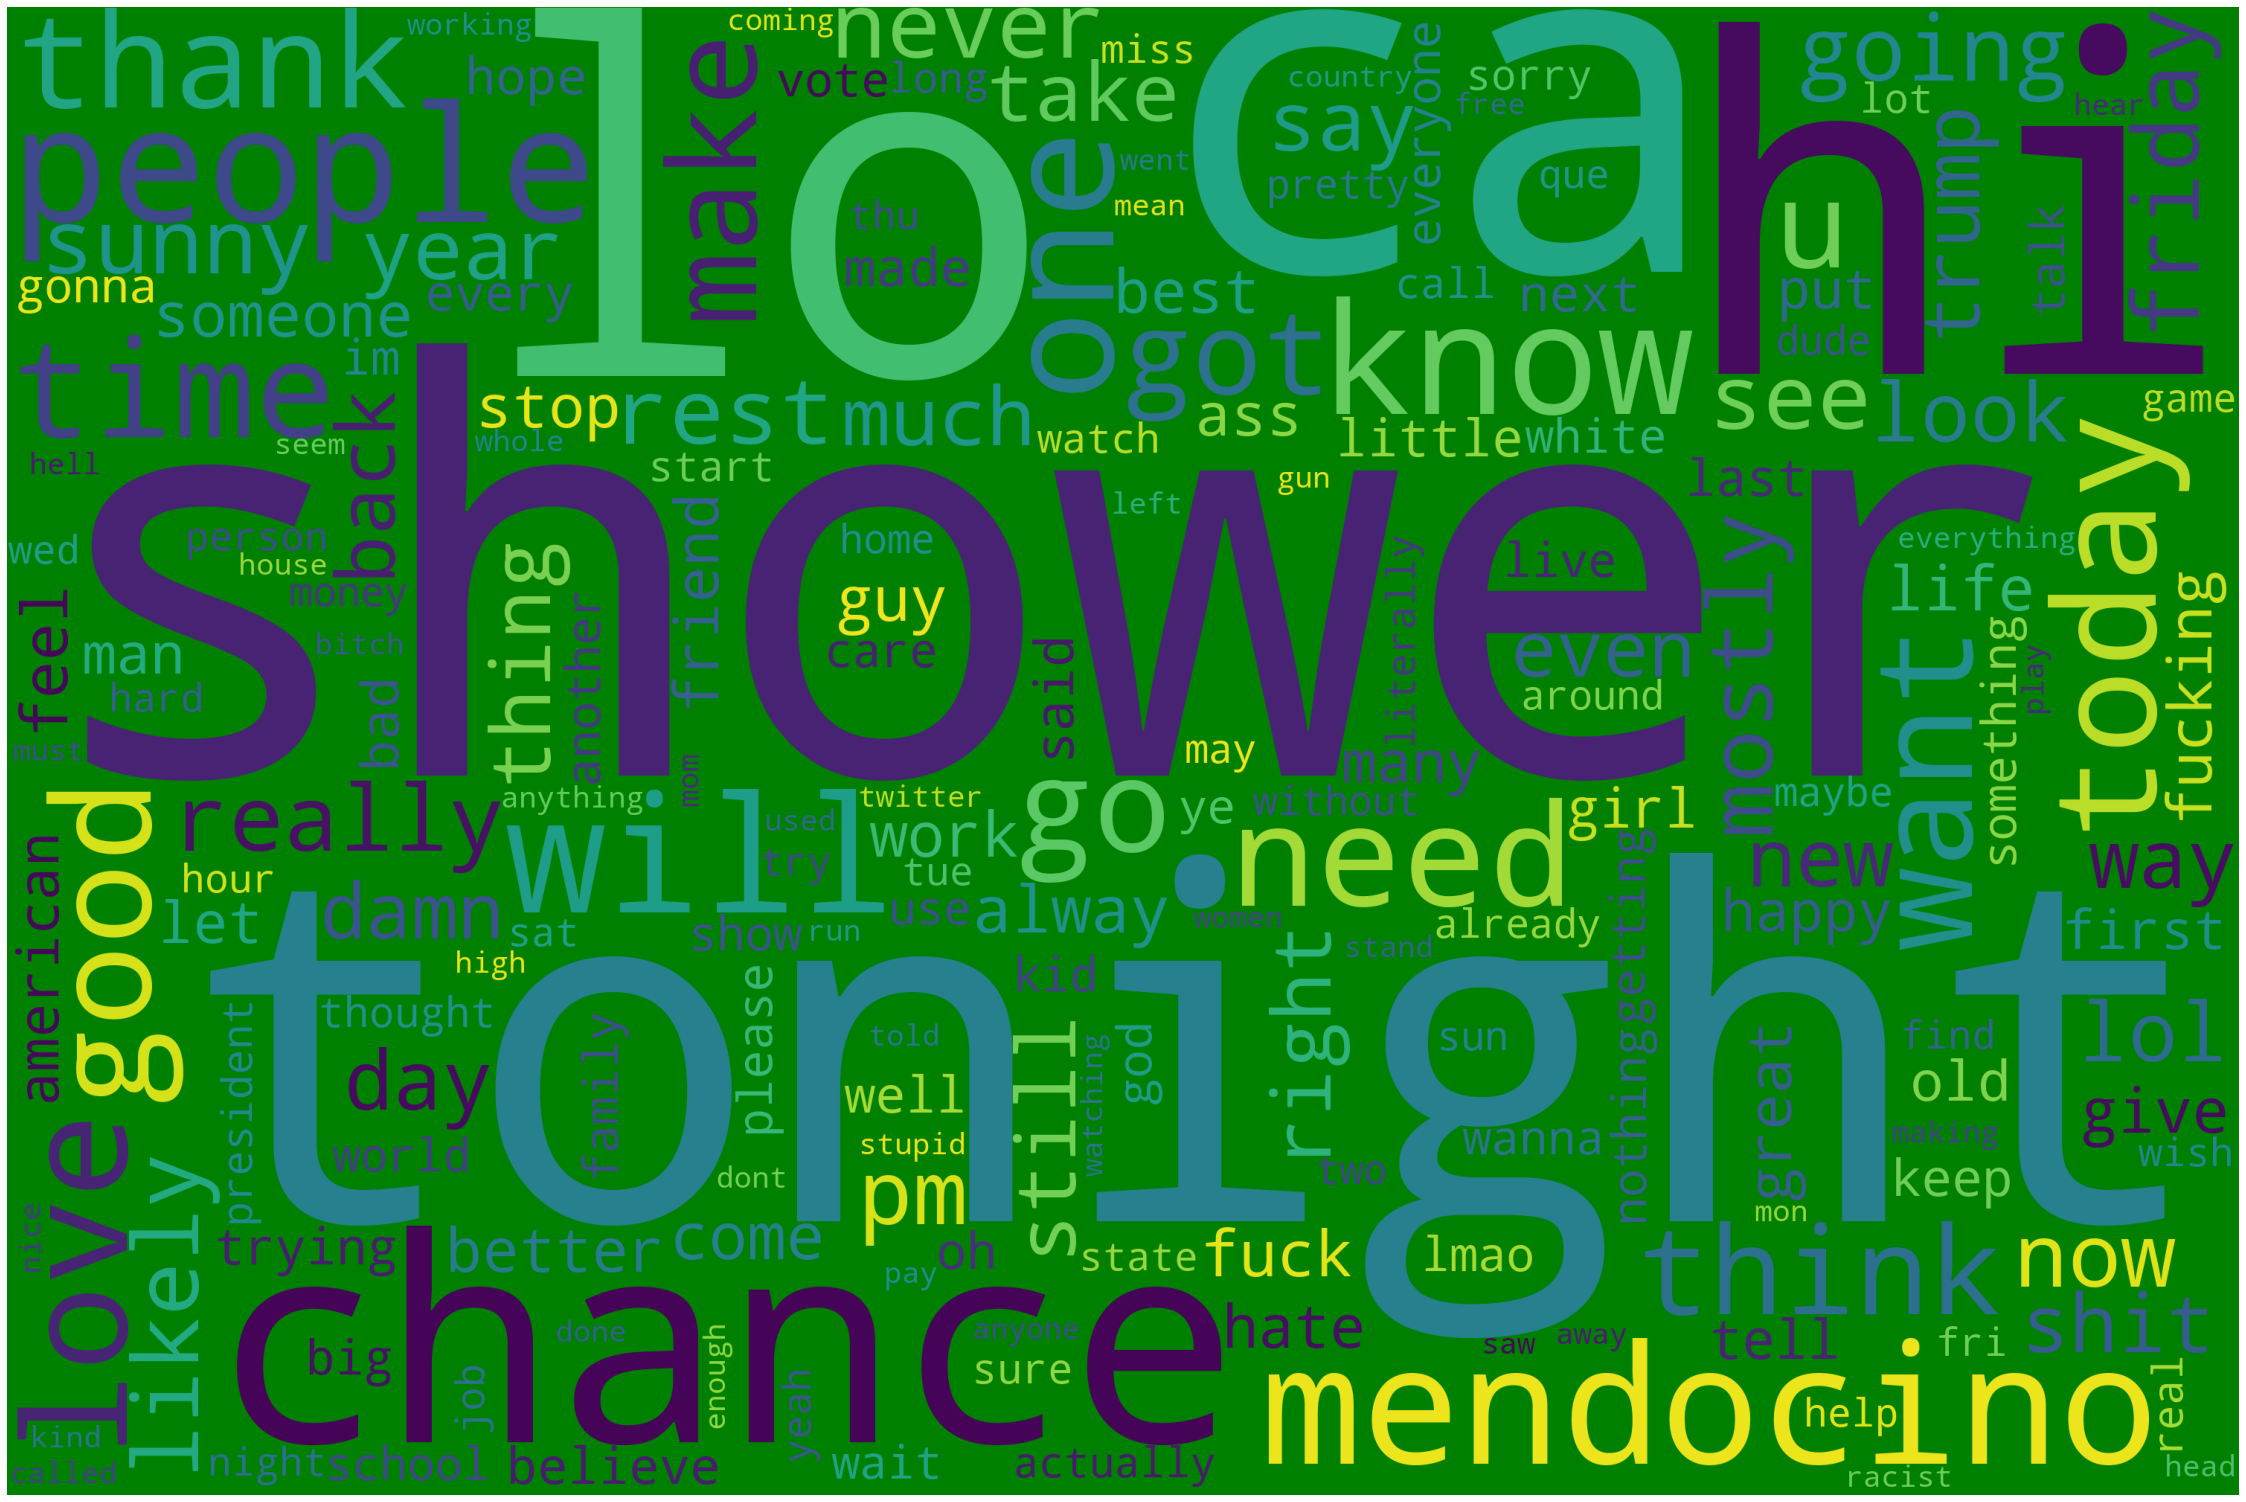

In [9]:
wc = WordCloud(width=3000, height=2000, relative_scaling=0.5, random_state=1, background_color="green", collocations=False, stopwords=STOPWORDS).generate(" ".join(words))
plt.figure(figsize=(40,30))
plt.imshow(wc)
plt.axis("off")

In [122]:
hospital_tweets
hospital_tweets['created_at'] = [datetime.strptime(d,'%Y-%m-%dT%H:%M:%S.%fZ') for d in hospital_tweets['created_at']]

hospital_tweets['date'] = [d.date() for d in hospital_tweets['created_at']]

In [130]:
len(hospital_tweets)

12183

Let's see if we can determine any latent topics.

In [123]:
from nltk.tokenize import TweetTokenizer
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
import re

In [132]:
cleaned_tweets = []
lemmatizer = WordNetLemmatizer()
tt = TweetTokenizer()
stopword_list = nltk.corpus.stopwords.words("english")
hosp_tweet_text = hospital_tweets['text']
for tweet in hosp_tweet_text:
    t = tweet.lower()
#     t = remove_special_characters(t)
    t = tt.tokenize(t)
    t = [w for w in t if w.isalpha()]
    t = [lemmatizer.lemmatize(w) for w in t]
#     t = [w for w in t if w not in words_to_remove]
    cleaned_tweets.append(t)
# This is so we can pass this value into the count vectorizer
ct = [" ".join(t) for t in cleaned_tweets]

In [133]:
# Let's see how we can extract feature counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_df=.9, min_df=10)
termFrequency = cv.fit_transform(ct)
feature_names = cv.get_feature_names_out()

In [134]:
from sklearn.decomposition import LatentDirichletAllocation
n_components = 10
lda = LatentDirichletAllocation(n_components=n_components, random_state=42)

topic_assignment = lda.fit_transform(termFrequency)

In [135]:
for idx, topic in enumerate(lda.components_):
    print("Topic", idx," ".join(feature_names[i] for i in np.argsort(topic)[-20:]))

Topic 0 country house want sorry did power idiot game president fucking time woman racist think white way trump vote just love
Topic 1 law say need talking talk time actually love just know doe guy like thing lmao really shit make fuck damn
Topic 2 month better need bad tired fake like wa twitter wow use did gun kid oh think yes hate just people
Topic 3 night morning ready right getting bed rn matter time tomorrow good true mean week finally work just need thanks day
Topic 4 fight know suck didn year school said wait say today did thought like girl just time friend got good wa
Topic 5 tue fri thu wed sat sun sunny likely pm rest friday today forecast lo mendocino chance hi ca tonight shower
Topic 6 nice stop old night free hope doing people love best yeah got sick wa just little right come year new
Topic 7 believe think change right pay child dont movie money just want wall great life trump american people like look ha
Topic 8 time school thing lot girl love proud ha bad left real year

In [136]:
topics = np.argmax(topic_assignment, axis=1)
hospital_tweets['topic'] = topics
topic_by_date = pd.pivot_table(hospital_tweets, values="id",index='date',columns='topic', aggfunc='count',fill_value=0)
tbd = topic_by_date.reset_index()

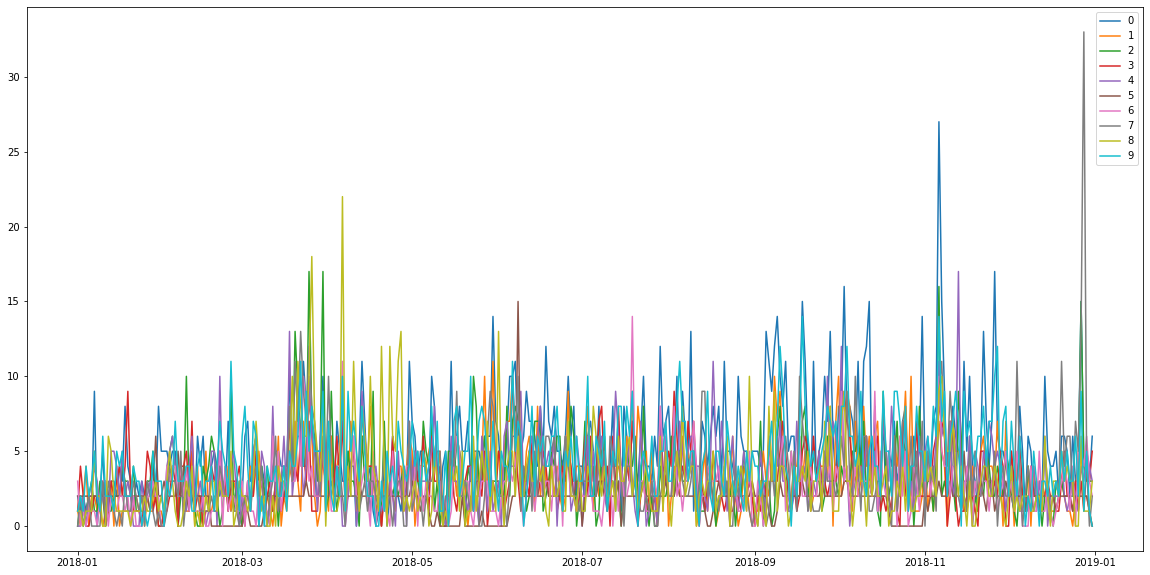

In [137]:
plt.figure(figsize=(20,10))
for i in range(0,10):
    plt.plot(tbd['date'],tbd[i], label=i)
    
plt.legend()

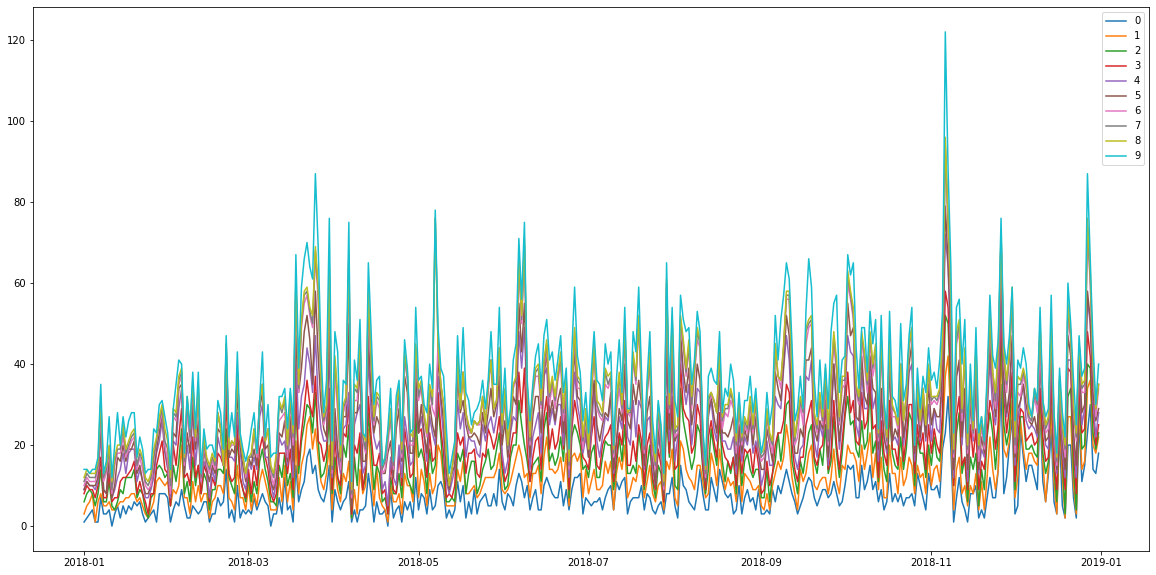

In [52]:
plt.figure(figsize=(20,10))
sum_topics = np.zeros(len(tbd[0]))
for i in range(0,10):
    sum_topics = sum_topics+tbd[i]
    plt.plot(tbd['date'],sum_topics, label=i)
    
plt.legend()

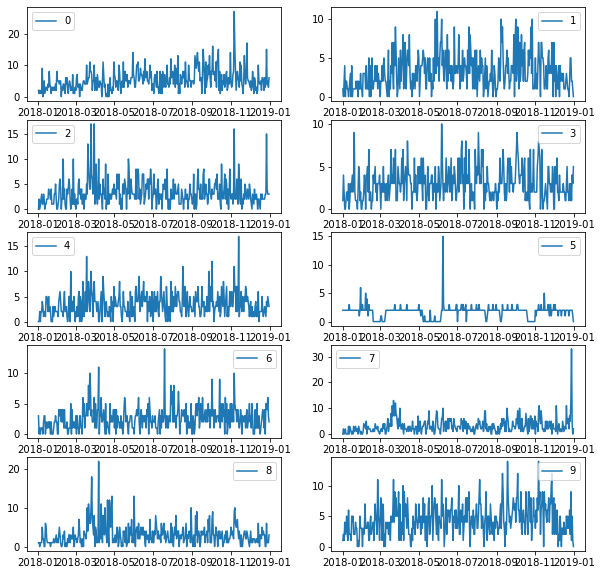

In [138]:
# plt.subplots(2, 5)
plt.figure(figsize=(10,10))
for i in range(0,10):
    plt.subplot(5,2, i+1)
    plt.plot(tbd['date'],tbd[i], label=i)
    plt.legend()
    

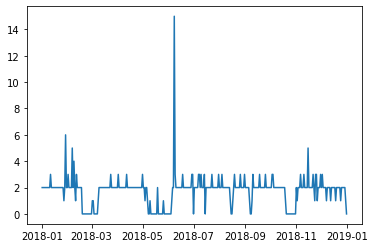

In [140]:
# Looks like something is particularly salient at topic 5...let's see:
plt.plot(tbd['date'],tbd[5])

In [143]:
hosp_5 = hospital_tweets[hospital_tweets['topic']==5]
mask = (hosp_5['date']>datetime(2018,6,1).date()) & (hosp_5['date']<datetime(2018,6,15).date())
hosp_5_masked = hosp_5[mask]

(array([ 1.,  2.,  2., 15.,  3.,  2.,  2.,  2.,  2.,  2.]),
 array([17687. , 17687.9, 17688.8, 17689.7, 17690.6, 17691.5, 17692.4,
        17693.3, 17694.2, 17695.1, 17696. ]),
 <BarContainer object of 10 artists>)

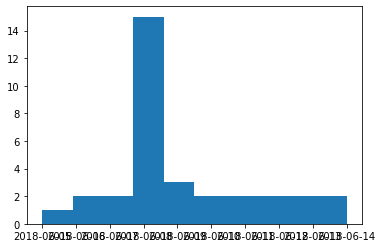

In [144]:
plt.hist(hosp_5_masked['date'])

In [148]:
hosp_5_masked

id                                               text  \
7177  1007277147440975872  Mendocino CA Thu Jun 14th AM Forecast: REST OF...   
7192  1007050631289495557  Mendocino CA Wed Jun 13th PM Forecast: TONIGHT...   
7215  1006914752646471680  Mendocino CA Wed Jun 13th AM Forecast: REST OF...   
7235  1006688325099454465  Mendocino CA Tue Jun 12th PM Forecast: TONIGHT...   
7251  1006552436830621698  Mendocino CA Tue Jun 12th AM Forecast: REST OF...   
7277  1006325845022203905  Mendocino CA Mon Jun 11th PM Forecast: TONIGHT...   
7292  1006189961081704448  Mendocino CA Mon Jun 11th AM Forecast: REST OF...   
7311  1005963470351806464  Mendocino CA Sun Jun 10th PM Forecast: TONIGHT...   
7329  1005827566912131072  Mendocino CA Sun Jun 10th AM Forecast: REST OF...   
7336  1005601110386716673  Mendocino CA Sat Jun 9th PM Forecast: TONIGHT ...   
7347  1005546829004529664                 @ArianaGrande hi, love you byeee😋💕   
7353  1005465209966923778  Mendocino CA Sat Jun 9th AM Forecast: REST OF ...   
7369  1005238721573253121  Mendocino CA Fri Jun 8th PM Forecast: TONIGHT ...   
7372  1005215570801954818  22:30 W1EJ (ED) on W6/NC-023 (Horse Mountain, ...   
7374  1005212833372663809  22:19 W1EJ (ED) on W6/NC-023 (Horse Mountain, ...   
7375  1005212831858520064  22:19 W1EJ (ED) on W6/NC-023 (Horse Mountain, ...   
7377  1005208344066437121  22:01 AA0BV (Joe) on W6/NC-023 (Horse Mountain...   
7386  1005176025708400645  19:53 W1EJ (ED) on W6/CC-011 (Hull Mountain, 2...   
7387  1005174531659530241  19:47 AA0BV (Joe) on W6/CC-011 (Hull Mountain,...   
7388  1005174280928317441  19:46 W1EJ (ED) on W6/CC-011 (Hull Mountain, 2...   
7391  1005169795363467270  19:28 W1EJ (ED) on W6/CC-011 (Hull Mountain, 2...   
7393  1005169294412574721  19:26 AA0BV (Joe) on W6/CC-011 (Hull Mountain,...   
7400  1005154766899404801  Rest In Peace, Chef Anthony Bourdain 😞 #RIP #P...   
7408  1005132146615320576  16:58 W1EJ (ED) on W6/NC-008 (Big Signal Peak,...   
7410  1005125420403056641  16:32 W1EJ (ED) on W6/NC-008 (Big Signal Peak,...   
7411  1005124920156868608  16:30 AA0BV (Joe) on W6/NC-008 (Big Signal Pea...   
7416  1005102827323183104  Mendocino CA Fri Jun 8th AM Forecast: REST OF ...   
7442  1004876279336919040  Mendocino CA Thu Jun 7th PM Forecast: TONIGHT ...   
7462  1004740398722502656  Mendocino CA Thu Jun 7th AM Forecast: REST OF ...   
7493  1004513920583962624  Mendocino CA Wed Jun 6th PM Forecast: TONIGHT ...   
7515  1004378023204917248  Mendocino CA Wed Jun 6th AM Forecast: REST OF ...   
7562  1004151505316872193  Mendocino CA Tue Jun 5th PM Forecast: TONIGHT ...   
7584  1004015660379328512  Mendocino CA Tue Jun 5th AM Forecast: REST OF ...   

                                                    geo          created_at  \
7177  {'coordinates': {'type': 'Point', 'coordinates... 2018-06-14 15:02:40   
7192  {'coordinates': {'type': 'Point', 'coordinates... 2018-06-14 00:02:35   
7215  {'coordinates': {'type': 'Point', 'coordinates... 2018-06-13 15:02:39   
7235  {'coordinates': {'type': 'Point', 'coordinates... 2018-06-13 00:02:54   
7251  {'coordinates': {'type': 'Point', 'coordinates... 2018-06-12 15:02:56   
7277  {'coordinates': {'type': 'Point', 'coordinates... 2018-06-12 00:02:32   
7292  {'coordinates': {'type': 'Point', 'coordinates... 2018-06-11 15:02:35   
7311  {'coordinates': {'type': 'Point', 'coordinates... 2018-06-11 00:02:35   
7329  {'coordinates': {'type': 'Point', 'coordinates... 2018-06-10 15:02:33   
7336  {'coordinates': {'type': 'Point', 'coordinates... 2018-06-10 00:02:42   
7347                   {'place_id': '0742517d53e00505'} 2018-06-09 20:27:00   
7353  {'place_id': 'fbd6d2f5a4e4a15e', 'coordinates'... 2018-06-09 15:02:41   
7369  {'place_id': 'fbd6d2f5a4e4a15e', 'coordinates'... 2018-06-09 00:02:42   
7372  {'place_id': 'fbd6d2f5a4e4a15e', 'coordinates'... 2018-06-08 22:30:42   
7374  {'place_id': 'fbd6d2f5a4e4a15e', 'coordinates'... 2018-06-08 22:19:50   
7375  {'place_id': 'fbd6d2f5a4e4a15e',

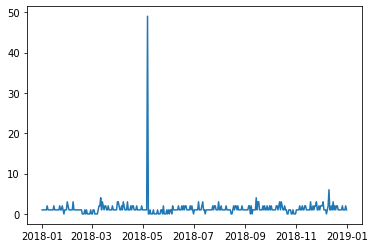

In [89]:
plt.plot(tbd['date'],tbd[7])

In [112]:
# Why is there a spike in 7?
hosp_7 = hospital_tweets[hospital_tweets['topic']==7]
mask = (hosp_7['date']>datetime(2018,5,2).date()) & (hosp_7['date']<datetime(2018,5,10).date())
hosp_7_masked = hosp_7[mask]

In [147]:
set(hosp_7_masked)

{'created_at', 'date', 'geo', 'id', 'lat', 'lon', 'text', 'topic'}

(array([59., 40., 16., 18., 18., 18.,  8., 16., 19., 27.]),
 array([17837. , 17842.9, 17848.8, 17854.7, 17860.6, 17866.5, 17872.4,
        17878.3, 17884.2, 17890.1, 17896. ]),
 <BarContainer object of 10 artists>)

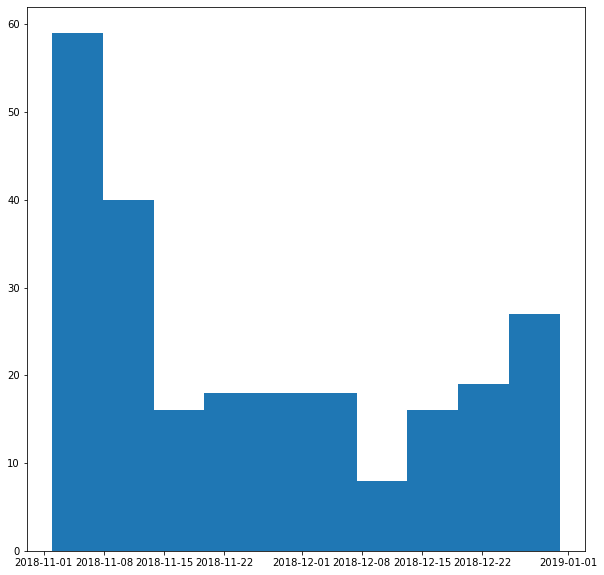

In [88]:
plt.figure(figsize=(10,10))
plt.hist(hosp_9_nov_dec['date'])

In [80]:
datetime(2018,11,1)

datetime.datetime(2018, 11, 1, 0, 0)

Frank R Howard


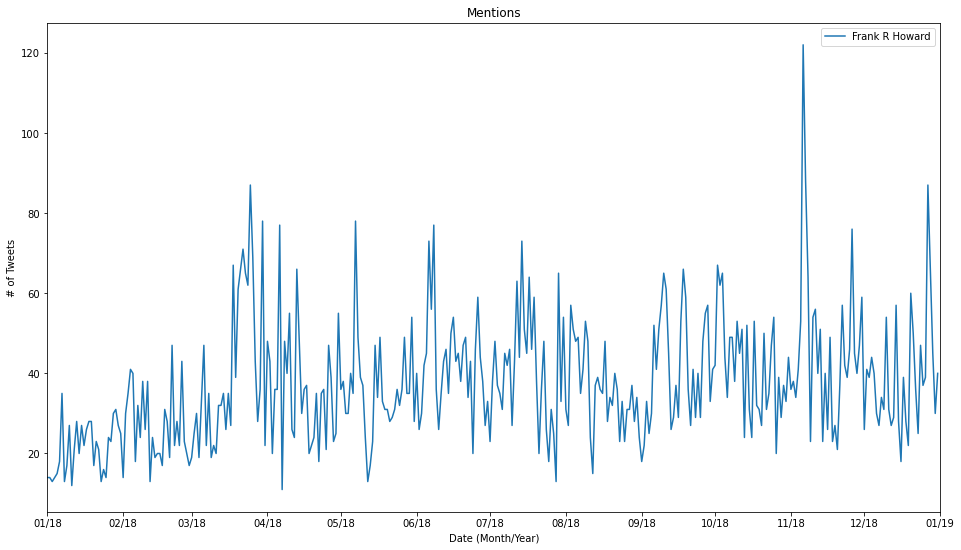

In [41]:
ut.graph_tweet_count([df],datetime(2018,1,1), datetime(2019,1,1), labels=['Frank R Howard'])

<AxesSubplot:xlabel='date'>

<Figure size 720x720 with 0 Axes>

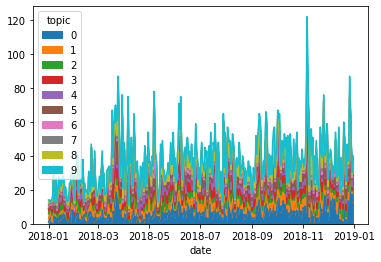

In [37]:
plt.figure(figsize=(10,10))
topic_by_date.plot.area()

In [74]:
hosp_count_7 = hospital_tweets[hospital_tweets['topic']==7]

36                          @LoLoBabb1212 Congratulations!
49       quien esté pensando en mi ya parenle porque no...
65       Mendocino CA Sat Dec 29th PM Forecast: TONIGHT...
113      Mendocino CA Fri Dec 28th PM Forecast: TONIGHT...
175      Mendocino CA Thu Dec 27th PM Forecast: TONIGHT...
                               ...                        
13314    Mendocino CA Thu Jan 4th PM Forecast: TONIGHT ...
13325    Mendocino CA Wed Jan 3rd PM Forecast: TONIGHT ...
13341    Mendocino CA Tue Jan 2nd PM Forecast: TONIGHT ...
13354    Mendocino CA Mon Jan 1st PM Forecast: TONIGHT ...
13364    Mendocino CA Sun Dec 31st PM Forecast: TONIGHT...
Name: text, Length: 483, dtype: object

**Where to leave off?**
Well...it looks like there is something interesting with looking at hospital data. It would be interesting to see how topics change over time. Is it possible that people are tweeting about specific health issues when we would expect them to?

Can we detect when there is likely to be a health problem, or if the air quality is bad?

My thinking: Give this a shot once, and see if maybe there is an analysis we can attempt!


# Coming back to wildfire topics
Let's see if we can see any topics, and see if they do indeed change over time

In [12]:
df = pd.read_csv('mendocino.csv')

In [13]:
!pip3 install wordcloud

     |████████████████████████████████| 220 kB 5.2 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158783 sha256=4a176378d87cb45cd7c85a721bfbb2dbbfa25cfae2ebf59eff74edbadc61a4a8
  Stored in directory: /Users/zach/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [15]:
from wordcloud import WordCloud, STOPWORDS

In [28]:
wf_tweets = df['text']
words = []
for t in wf_tweets:
    t = t.lower()
    t = [w for w in t.split(" ") if w.isalpha()]
    words = words + t

In [46]:
# Add stopwords to make sure we ignore the expected words
STOPWORDS.update(['fire','smoke','wildfire','wildfires','fires','forest'])

In [47]:
wc = WordCloud(width=3000, height=2000, relative_scaling=0.5, random_state=1, background_color="green", collocations=False, stopwords=STOPWORDS).generate(" ".join(words))
plt.figure(figsize=(40,30))
plt.imshow(wc)
plt.axis("off")

(-0.5, 2999.5, 1999.5, -0.5)

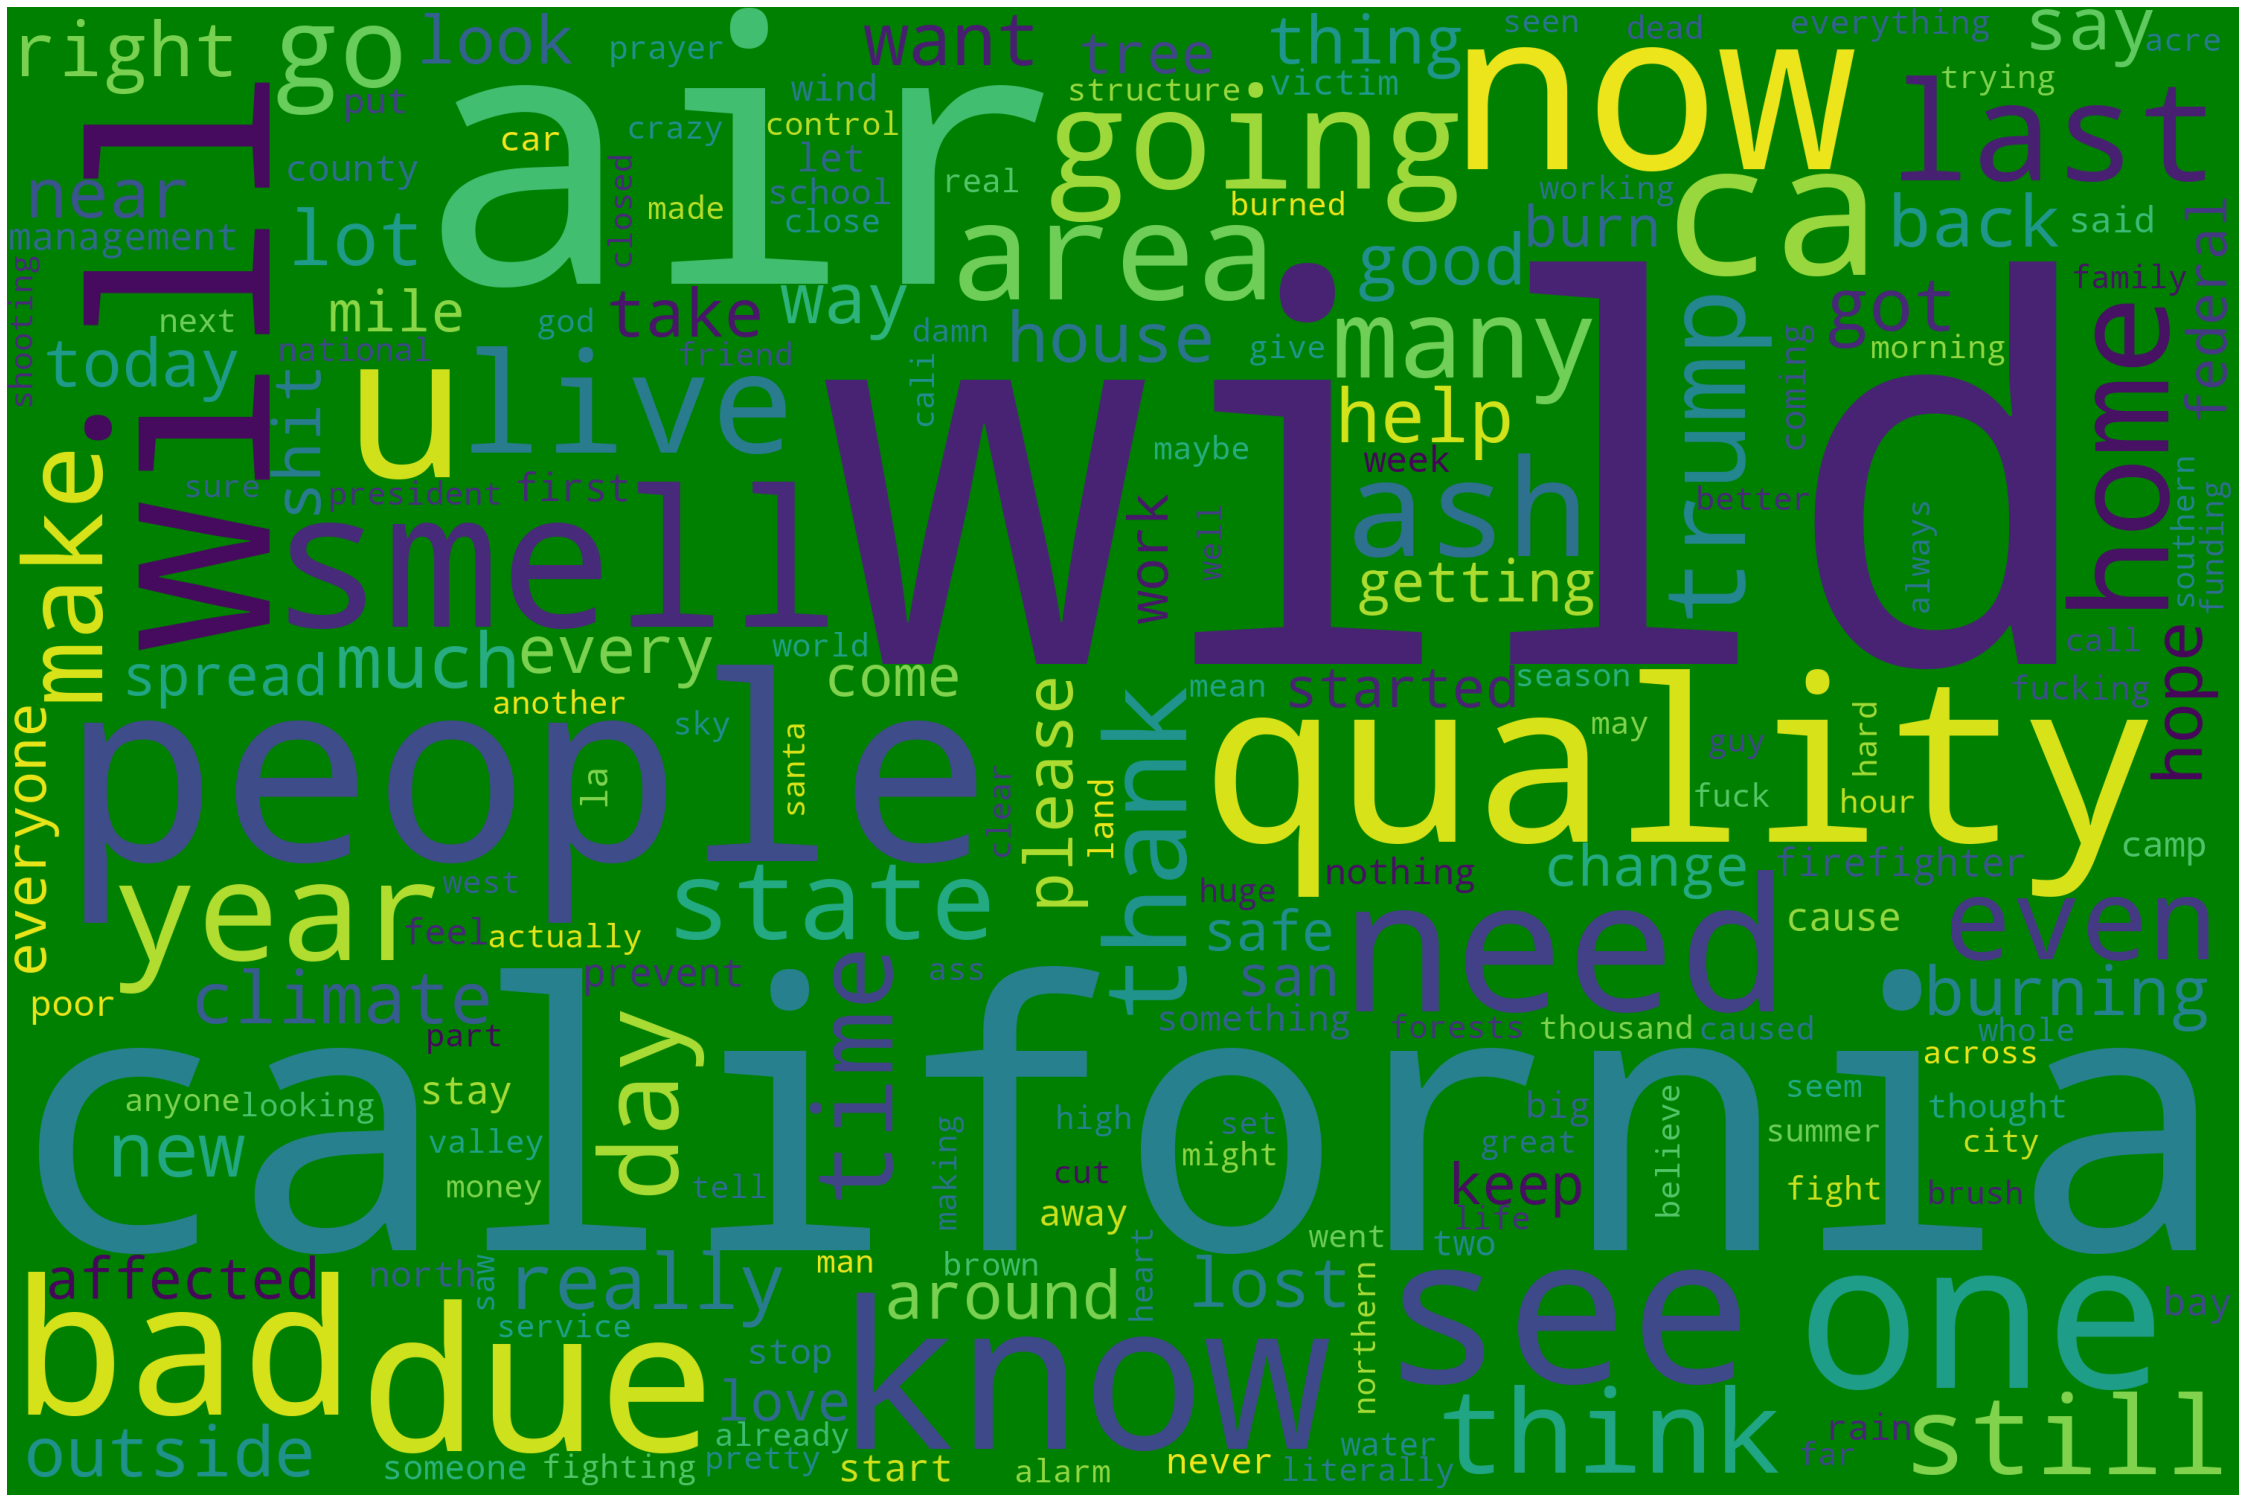

In [49]:
plt.figure(figsize=(40,30))
plt.imshow(wc)
plt.axis("off")

In [71]:
from nltk.tokenize import TweetTokenizer
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
import re

In [60]:
# Let's go ahead and clean up the tweets
tt = TweetTokenizer()
stopword_list = nltk.corpus.stopwords.words("english")

In [ ]:
# This is only needed if you've never run this before!
# nltk.download('wordnet')

In [131]:
wf_tweets = df['text']
cleaned_tweets = []
lemmatizer = WordNetLemmatizer()

# Adding in an extra filter to remove some words
words_to_remove = ["wildfire", "just", "let"]
for tweet in wf_tweets:
    t = tweet.lower()
#     t = remove_special_characters(t)
    t = tt.tokenize(t)
    t = [w for w in t if w.isalpha()]
    t = [lemmatizer.lemmatize(w) for w in t]
    t = [w for w in t if w not in words_to_remove]
    cleaned_tweets.append(t)
# This is so we can pass this value into the count vectorizer
ct = [" ".join(t) for t in cleaned_tweets]

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_df=.8, min_df=5)
termFrequency = cv.fit_transform(ct)
feature_names = cv.get_feature_names_out()

In [178]:
termFrequency

<5567x2183 sparse matrix of type '<class 'numpy.int64'>'
	with 52547 stored elements in Compressed Sparse Row format>

In [135]:
from sklearn.decomposition import LatentDirichletAllocation
n_components = 5
lda = LatentDirichletAllocation(n_components=5, random_state=42)

topic_assignment = lda.fit_transform(termFrequency)

In [136]:
for idx, topic in enumerate(lda.components_):
    print("Topic", idx," ".join(feature_names[i] for i in np.argsort(topic)[-10:]))

Topic 0 state water climate time change ha forest wild like california
Topic 1 lost life thank california safe family smoke home people wild
Topic 2 land year like tree management ca wild trump california forest
Topic 3 today day people wa like ash bad quality smoke air
Topic 4 started area near alarm wild house like smell wa smoke


In [140]:
topics = np.argmax(topic_assignment, axis=1)

In [143]:
df['topic'] = topics

In [144]:
df

Unnamed: 0                   id  \
0             13  1091061532023173121   
1             17  1091043370649116672   
2             18  1091043339292487680   
3             19  1091041883151712257   
4             21  1091020007805317120   
...          ...                  ...   
5562       21952   948021954417606656   
5563       21961   947954852058951680   
5564       21970   947905231844622336   
5565       21984   947719251095314432   
5566       21985   947708466721800192   

                                                   text  \
0     @kapono_lucas All their soups are pretty fire....   
1     PG&amp;E attorney: Goal is to establish a trus...   
2     Attending 411 sen hearing on wildfires. 140 de...   
3     In bankruptcy court for PG&amp;E hearing. PG&a...   
4     @BrandiKruse @waDNR @Hilary_FranzCPL Nope. The...   
...                                                 ...   
5562  Darien Cl: Metro Engine 50 on scene reporting ...   
5563  @KevinNews3LV @News3LV Is that normal? I don’t...   
5564  SPARC, remember, survived the Sonoma wildfires...   
5565  I just asked by pair of tourist if the fire wa...   
5566  @Sasseam I have been here for months. Only saw...   

                                   geo           created_at        lat  \
0     {'place_id': '8fa6d7a33b83ef26'}  2019-01-31 19:51:54  35.984784   
1     {'place_id': '5a110d312052166f'}  2019-01-31 18:39:44  37.708075   
2     {'place_id': 'b71fac2ee9792cbe'}  2019-01-31 18:39:37  38.437920   
3     {'place_id': '5a110d312052166f'}  2019-01-31 18:33:50  37.708075   
4     {'place_id': '3b36422b848153f4'}  2019-01-31 17:06:54  36.527438   
...                                ...                  ...        ...   
5562  {'place_id': 'd950fc7dc2cd14f9'}  2018-01-02 02:43:41  38.637436   
5563  {'place_id': '3b77caf94bfc81fe'}  2018-01-01 22:17:03  33.704538   
5564  {'place_id': 'e5aa5b4c943f642b'}  2018-01-01 18:59:53  38.384995   
5565  {'place_id': '0509a6acb3d27ec4'}  2018-01-01 06:40:51  34.126875   
5566  {'place_id': '5ba10bd86075a50f'}  2018-01-01 05:58:00  34.381692   

             lon        date  topic  
0    -115.209254  2019-01-31      4  
1    -122.514926  2019-01-31      2  
2    -121.576613  2019-01-31      2  
3    -122.514926  2019-01-31      2  
4    -119.430683  2019-01-31      2  
...          ...         ...    ...  
5562 -121.262498  2018-01-02      4  
5563 -118.668404  2018-01-01      4  
5564 -122.848005  2018-01-01      4  
5565 -119.061758  2018-01-01      1  
5566 -119.544568  2018-01-01      0  

[5567 rows x 9 columns]

In [152]:
# Let's plot the topics!

topic_by_date = pd.pivot_table(df, values="id",index='date',columns='topic', aggfunc='count',fill_value=0)
tbd = topic_by_date.reset_index()

In [159]:
tbd = topic_by_date.reset_index()

In [173]:
tbd.rename(columns={0:'zero'})

topic        date  zero  1  2  3  4
0      2018-01-01     1  1  0  0  2
1      2018-01-02     1  1  2  7  2
2      2018-01-03     4  1  2  3  0
3      2018-01-04     1  0  2  3  0
4      2018-01-05     1  1  2  1  2
..            ...   ... .. .. .. ..
388    2019-01-27     3  0  2  2  1
389    2019-01-28     1  0  3  0  2
390    2019-01-29     3  0  1  3  4
391    2019-01-30     6  0  4  0  1
392    2019-01-31     0  3  6  0  2

[393 rows x 6 columns]

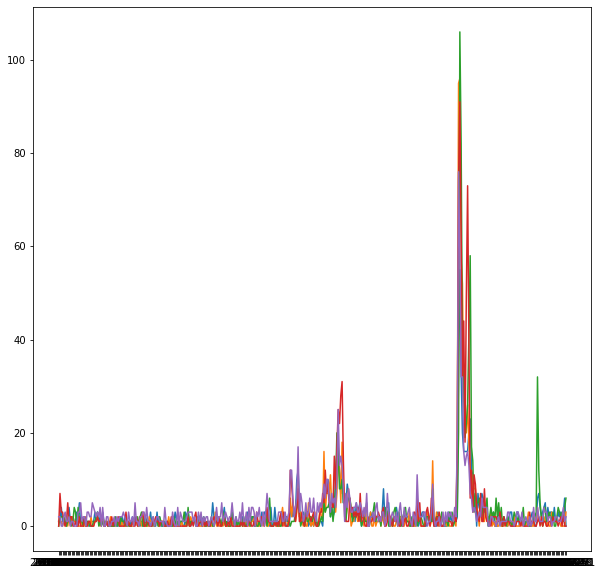

In [177]:
plt.figure(figsize=(10,10))
for i in range(0,5):
    plt.plot(tbd['date'],tbd[i])

In [161]:
plt.plot(tbd['date'], tbd['0'])

KeyError: '0'

In [61]:
# This is only needed if you've never run this before!
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/zach/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [1]:
# Code to get a specific account, so we can dig into their tweets
import requests
import json

In [4]:
def create_header():
        """
        This function reads from the json file that stores the bearer
        token for authenticating requests
        """
        with open('./.twitter_creds.json') as f:
            data = json.load(f)

        bearer = data["bearer_token"]
        headers = {
            'Authorization': 'Bearer '+bearer
        }
        
        return headers

In [10]:
url = "https://api.twitter.com/2/tweets?ids=1005212833372663809&expansions=author_id"

resp = requests.get(url,headers=create_header())

In [11]:
resp.json()

{'data': [{'author_id': '61220731',
   'id': '1005212833372663809',
   'text': '22:19 W1EJ (ED) on W6/NC-023 (Horse Mountain, 1428m, 4pt) 7.033 cw: *[RBNHole] at N6TV 21 WPM 16 dB SNR [RBNHOLE]'}],
 'includes': {'users': [{'id': '61220731',
    'name': 'SOTAwatch spots',
    'username': 'SOTAwatch'}]}}

# Summarize code for future use
In this section, I test out some code and turn some of the things I've found useful into code that will come in handy in the future from this notebook.

In [97]:
# I think I'll need to parse tweets more often. Let's go ahead and 
# create a useful data structure that contains all of the functionality
# for doing this. This is going to be built on top of the 
# pandas DataFrame object, so to initialize this data object, you
# will need to instantiate this class on a DataFrame.

class TwitterDataFrame(pd.DataFrame):
    """
    This is a subclass of the pandas dataframe that allows
    me to more quickly look at data in a specific way.
    
    I've added several functions to make working with tweets
    easier. Functionality includes:
    
    * zoom_in(lat, lon) -- set a pair of lat/lon tuples, and this
        function will return a dataframe that filters out features
    
    """
    
    def __init__(self, data=None, *args, **kwargs):
        super().__init__(data, *args, **kwargs)
    
    def count_by_day(self):
        return pd.pivot_table(self, values='id', index='date',aggfunc='count')
        
    def clean_date_col(self):
        self['created_at'] = [datetime.strptime(d,'%Y-%m-%dT%H:%M:%S.%fZ') for d in self['created_at']]
        
    def get_coords(self):
        lat = (min(self['lat']), max(self['lat']))
        lon = (min(self['lon']), max(self['lon']))
        return {
            "lat":lat,
            "lon":lon
        }
        
    def zoom_in(self, lat, lon):
        lat1 = min(lat); lat2 = max(lat)
        lon1 = min(lon); lon2 = max(lon)
        
        mask1 = (self['lon'] > lon1) & (self['lon'] < lon2)
        mask2 = (self['lat'] > lat1) & (self['lat'] < lat2)
        
        return TwitterDataFrame(self[mask1 & mask2])
    
    def
        

In [98]:
tdf = TwitterDataFrame(pd.read_csv('mendocino.csv'))

In [102]:
type(tdf['created_at'])

pandas.core.series.Series

In [83]:
max(tdf['lat'])

41.991795

<AxesSubplot:>

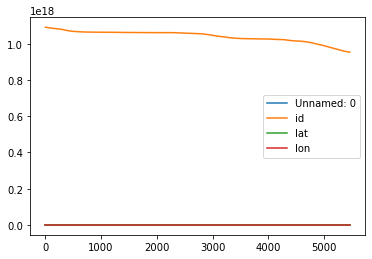

In [67]:
zt.plot()

In [65]:
min(zt['lat'])

32.730647

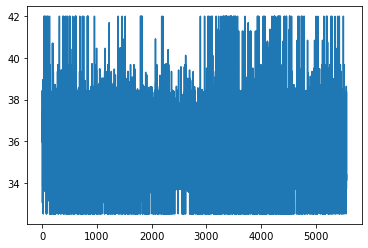

In [59]:
plt.plot(range(0,len(tdf)),tdf['lat'])

In [ ]:
TwitterDataFramedd